In [2]:
import pandas as pd
import numpy as np
import psycopg2
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [2]:
# !pip install sklearn

In [7]:
df_2019 = pd.read_csv('../../data/housing2019.csv', encoding='latin-1')


In [9]:
'''
add zeros to columns and populate new column Major_+_Minor
'''
df_2019['Major'] = df_2019['Major'].astype('str').str.zfill(6)
df_2019['Minor'] = df_2019['Minor'].astype('str').str.zfill(4)
df_2019['Major_+_Minor'] = df_2019['Major'] + df_2019['Minor']
df_2019.shape

(43545, 158)

In [4]:
def common_columns(a, b): 
    """
    this function takes in two pandas dfs and returns a list of columns that they have in common
    """
    
    a_set = set(a.columns) 
    b_set = set(b.columns) 
    if (a_set & b_set): 
        print(a_set & b_set) 
    else: 
        print("No common elements")

In [11]:
print(df_2019.shape)
for _ in df_2019.columns:
    print(_)

(43545, 158)
Unnamed: 0
Major_x
Minor_x
BldgNbr
NbrLivingUnits
Address
BuildingNumber
Fraction
DirectionPrefix
StreetName
StreetType
DirectionSuffix
ZipCode
Stories
BldgGrade
BldgGradeVar
SqFt1stFloor
SqFtHalfFloor
SqFt2ndFloor
SqFtUpperFloor
SqFtUnfinFull
SqFtUnfinHalf
SqFtTotLiving
SqFtTotBasement
SqFtFinBasement
FinBasementGrade
SqFtGarageBasement
SqFtGarageAttached
DaylightBasement
SqFtOpenPorch
SqFtEnclosedPorch
SqFtDeck
HeatSystem
HeatSource
BrickStone
ViewUtilization
Bedrooms
BathHalfCount
Bath3qtrCount
BathFullCount
FpSingleStory
FpMultiStory
FpFreestanding
FpAdditional
YrBuilt
YrRenovated
PcntComplete
Obsolescence
PcntNetCondition
Condition
AddnlCost
pin
ExciseTaxNbr
Major_y
Minor_y
DocumentDate
SalePrice
RecordingNbr
Volume
Page
PlatNbr
PlatType
PlatLot_x
PlatBlock_x
SellerName
BuyerName
PropertyType
PrincipalUse
SaleInstrument
AFForestLand
AFCurrentUseLand
AFNonProfitUse
AFHistoricProperty
SaleReason
PropertyClass
SaleWarning
Major
Minor
PropName
PlatName
PlatLot_y
PlatBlock

In [14]:
df_2019['Major_+_Minor']

0        0087000215
1        0088000177
2        0088000226
3        0084000171
4        0098000940
            ...    
43540    4039700280
43541    4040100170
43542    4040800180
43543    4046600310
43544    4053200260
Name: Major_+_Minor, Length: 43545, dtype: object

In [13]:
combined_df['LivableSpace'] = combined_df['SqFtTotLiving'] + combined_df['SqFtFinBasement'] + combined_df['SqFtDeck']

In [108]:
"""
selecting interested columns
"""
groomed_df = combined_df[['Major_+_Minor', 'SalePrice', 'SqFtTotLiving', 'SqFtOpenPorch', 
                          'SqFtEnclosedPorch', 'SqFtDeck', 'TidelandShoreland',
                          'TrafficNoise', 'AirportNoise', 'PowerLines', 'Stories', 'Condition', 'Area', 
                          'DocumentDate', 'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances']]
# pd.DataFrame(groomed_df['Major_+_Minor'].value_counts()).iloc[100:]
# groomed_df[groomed_df['Major_+_Minor'] == '0415100049'].sort_values('DocumentDate', ascending=False)

In [109]:
"""
filtering data
"""

groomed_df = groomed_df[groomed_df['SalePrice'] > 0]
groomed_df = groomed_df[groomed_df['SalePrice'] < 5000000]
#groomed_df = groomed_df[groomed_df['LivableSpace'] < 50000]
groomed_df = groomed_df[groomed_df['SqFtTotLiving'] < 50000]
groomed_df = groomed_df[groomed_df['DocumentDate'].str.contains('2019')]

In [104]:
groomed_df['Area'].unique()

array([ 35.,  19.,  37.,  29.,  95.,  71.,  51.,  94.,  28.,  12.,  79.,
        32.,  59.,  82.,   4.,  36.,  38.,  56.,  88.,  55.,  49.,  52.,
         6.,  91.,  44.,  39.,  73.,   2.,  27.,  45.,  53.,   8.,  62.,
         1.,  74.,  41.,   3.,  69.,  72.,  30.,  75.,  92.,  43.,  21.,
        24.,  16.,  66.,  31.,  85.,  17.,  34.,  46.,  96.,  80.,  61.,
         7.,  13.,  11.,  15.,  57.,  25., 100.,  67.,  48.,  90.,  65.,
        26.,  42.,  18.,  54.,  93.,  22.,  68.,  60.,  58.,  40.,  64.,
        33.,  81.,  47.,  14.,  77.,  86.,  23.,  84.,  87.,  70.,  63.])

In [ ]:
fig, ax = plt.subplots()

ax = sns.scatterplot(data=groomed_df, x='SalePrice', y='SqFtTotLiving')
ax.set(xlim=(0, 10000000), ylim=(0, 50000))

In [19]:
fsm = ols(formula='SalePrice ~ SqFtTotLiving', data=groomed_df).fit()
b = fsm.params.Intercept
m = fsm.params.SqFtTotLiving
m, b

(303.60289215610084, 124078.80489745832)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.scatterplot(x='SqFtTotLiving', y='SalePrice', data=groomed_df)
x = np.linspace(0,50000)
ax = plt.plot(x, ((m*x) + b))

In [ ]:
fsm = ols(formula='SalePrice ~ SqFtTotLiving', data=groomed_df).fit()

rainbow_statistic, rainbow_p_value = linear_rainbow(fsm)
print('p val: ', rainbow_p_value)
print('rainbow stat: ', rainbow_statistic)

In [115]:
fsm_multi = ols(formula='SalePrice ~ SqFtTotLiving + SqFtOpenPorch + SqFtDeck + TidelandShoreland + Condition + Stories + Area + TrafficNoise', data=groomed_df).fit()
fsm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     2246.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:18:39   Log-Likelihood:            -4.2501e+05
No. Observations:               29636   AIC:                         8.500e+05
Df Residuals:                   29627   BIC:                         8.501e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8.557e+04   1.72e+04      4.983      0.000    5.19e+04    1.19e+05
SqFtTotLiving       279.4924      2.885     96.884      0.000     273.838     285.147
SqFtOpenPorch       205.3177     18.271     11.237      0.000     169.505     241.130
SqFtDeck            184.5145     11.729     15.732      0.000     161.526     207.503
TidelandShoreland  3.624e+05   1.46e+04     24.820      0.000    3.34e+05    3.91e+05
Condition          1.733e+04   3756.061      4.613      0.000    9962.960    2.47e+04
Stories            4.723e+04   4924.734      9.591      0.000    3.76e+04    5.69e+04
Area              -1942.0469     89.151    -21.784      0.000   -2116.786   -1767.307
TrafficNoise[0]    1.694e+04   2093.580      8.093      0.000    1.28e+04     2.1e+04
TrafficNoise[1]    1.694e+04   2093.580      8.093      0.000    1.28e+04     2.1e+04
==============================================================================
Omnibus:                    14547.682   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225333.769
Skew:                           1.981   Prob(JB):                         0.00
Kurtosis:                      15.915   Cond. No.                     1.08e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#  y = 281.85*x1 + 178.87*x2 + 195.04*x3 + 356274.87*x4 + 126523.45

In [21]:
# fsm_multi.params
b = fsm_multi.params.Intercept
m = fsm_multi.params.SqFtTotLiving
m, b

(281.84185486722174, 126523.44885897034)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.scatterplot(x='SqFtTotLiving', y='SalePrice', data=groomed_df)
x = np.linspace(0,50000)
ax = plt.plot(x, (m*x + b))

In [ ]:
mlr = LinearRegression()
mlr.fit(groomed_df[['SqFtTotLiving', 'SqFtOpenPorch', 'SqFtDeck', 'TidelandShoreland']], groomed_df['SalePrice'])

In [ ]:
print(mlr.intercept_)
print(mlr.coef_)

In [23]:
df = groomed_df
a_surf, b_surf, c_surf, d_surf = np.meshgrid(np.linspace(df.SqFtTotLiving.min(), df.SqFtTotLiving.max(),100),
                                            np.linspace(df.SqFtOpenPorch.min(), df.SqFtOpenPorch.max(),100), 
                                            np.linspace(df.SqFtDeck.min(), df.SqFtDeck.max(),100), 
                                            np.linspace(df.TidelandShoreland.min(), df.TidelandShoreland.max(),100))

In [45]:
only_x = pd.DataFrame({'SqFtTotLiving': a_surf.ravel(),
                     'SqFtOpenPorch': b_surf.ravel(),
                     'SqFtDeck': c_surf.ravel(),
                     'TidelandShoreland': d_surf.ravel()})


In [46]:
fitted_y = fsm_multi.predict(exog=only_x)
fitted_y = np.array(fitted_y)

In [47]:
from mpl_toolkits import mplot3d

In [74]:
fitted_y.reshape(a_surf.shape)[0][0].shape

(100, 100)

ValueError: too many values to unpack (expected 2)

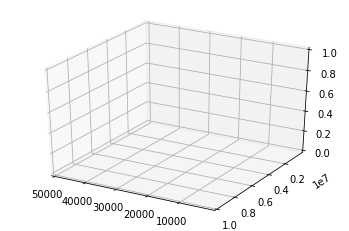

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df['SqFtTotLiving'], df['SqFtOpenPorch'], df['SalePrice'])
ax.set(ylim=10000000, xlim=50000)
ax.plot_surface(a_surf, b_surf, fitted_y.reshape(a_surf.shape)[0][0])

In [ ]:
correlated_cols = [
    'SalePrice',
    'SqFtTotLiving',
    'TidelandShoreland',
    'SqFtOpenPorch',
    'SqFtDeck'
]
correlated_df = groomed_df[correlated_cols]
sns.pairplot(correlated_df)